In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.2', 'qiskit-aer': '0.10.3', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
# Bernstein Vazirani algorithm
# using this algorithm to find secret number

from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [3]:
secretnumber = '1010000001'

In [4]:
# circuit = QuantumCircuit(6+1, 6)
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

# circuit.h([0,1,2,3,4,5]) # adding hadmad gate to the first 6 qubit out of the seven qubit
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier() # this add a vertical line

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))
        
# the for loop above replace the below 3 commented line of codes,
# but it reversed the output

# circuit.cx(5,6)
# circuit.cx(3,6)
# circuit.cx(0,6)

circuit.barrier()
# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.barrier()
# circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

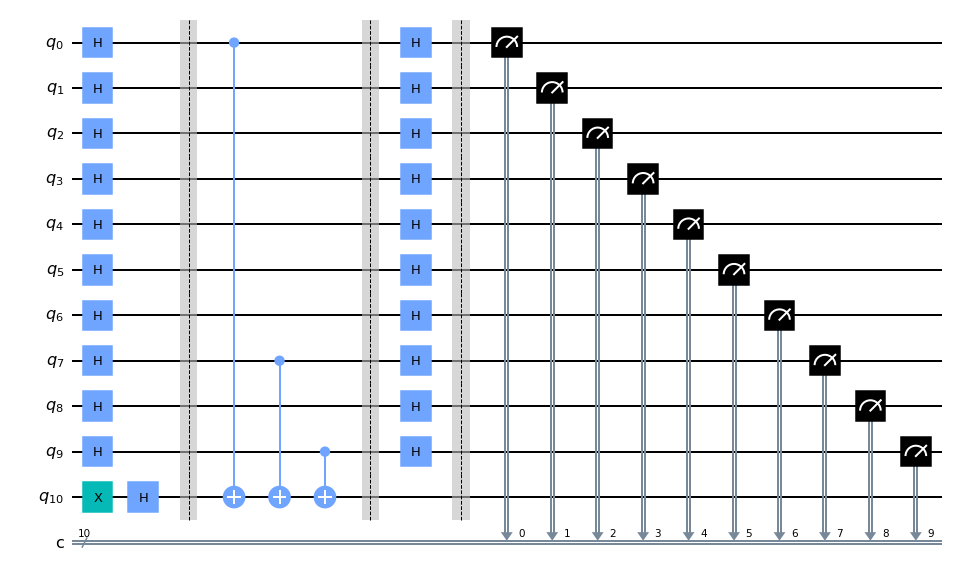

In [5]:
circuit.draw(output='mpl')

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1010000001': 1}
